In [1]:
import cv
import os
import h5py
import tensorflow 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [2]:
training_set = tensorflow.keras.utils.image_dataset_from_directory(r'D:\train data', labels="inferred", label_mode="categorical", class_names=None, color_mode="rgb", batch_size=32, image_size=(128, 128), shuffle=True, seed=None, validation_split=None, subset=None, interpolation="bilinear", follow_links=False, crop_to_aspect_ratio=False)

Found 5807 files belonging to 3 classes.


In [3]:
validation_set = tensorflow.keras.utils.image_dataset_from_directory(
    r'D:\valid data', 
    labels="inferred", 
    label_mode="categorical", 
    class_names=None, 
    color_mode="rgb", 
    batch_size=32, 
    image_size=(128, 128), 
    shuffle=True, 
    seed=None, 
    validation_split=None, 
    subset=None, 
    interpolation="bilinear", 
    follow_links=False, 
    crop_to_aspect_ratio=False)

Found 1451 files belonging to 3 classes.


In [4]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential

In [5]:
cnn = tensorflow.keras.models.Sequential()
cnn.add(tensorflow.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tensorflow.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tensorflow.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [6]:
cnn.add(tensorflow.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tensorflow.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tensorflow.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tensorflow.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tensorflow.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tensorflow.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tensorflow.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tensorflow.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tensorflow.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tensorflow.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tensorflow.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tensorflow.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tensorflow.keras.layers.Dropout(0.25))
cnn.add(tensorflow.keras.layers.Flatten())
cnn.add(tensorflow.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tensorflow.keras.layers.Dropout(0.4))


In [11]:
#Output Layer
cnn.add(tensorflow.keras.layers.Dense(units=3,activation='softmax'))

In [12]:
#Compiling and Training Phase
cnn.compile(optimizer=tensorflow.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [13]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


182/182 [==============================] - 167s 910ms/step - loss: 0.5008 - accuracy: 0.7834 - val_loss: 0.2339 - val_accuracy: 0.9083
Epoch 2/10
182/182 [==============================] - 169s 928ms/step - loss: 0.1983 - accuracy: 0.9260 - val_loss: 0.1374 - val_accuracy: 0.9476
Epoch 3/10
182/182 [==============================] - 171s 940ms/step - loss: 0.0885 - accuracy: 0.9664 - val_loss: 0.0583 - val_accuracy: 0.9807
Epoch 4/10
182/182 [==============================] - 169s 927ms/step - loss: 0.0505 - accuracy: 0.9828 - val_loss: 0.1131 - val_accuracy: 0.9676
Epoch 5/10
182/182 [==============================] - 169s 926ms/step - loss: 0.0476 - accuracy: 0.9836 - val_loss: 0.2378 - val_accuracy: 0.9297
Epoch 6/10
182/182 [==============================] - 169s 925ms/step - loss: 0.0456 - accuracy: 0.9840 - val_loss: 0.0748 - val_accuracy: 0.9766
Epoch 7/10
182/182 [==============================] - 169s 926ms/step - loss: 0.0545 - accuracy: 0.9817 - val_loss: 0.0552

In [14]:
#Evaluating Model
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

182/182 [==============================] - 48s 261ms/step - loss: 0.0022 - accuracy: 0.9995
Training accuracy: 0.9994834065437317


In [15]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

46/46 [==============================] - 12s 249ms/step - loss: 0.0287 - accuracy: 0.9890
Validation accuracy: 0.9889731407165527


In [16]:
#Saving Model
cnn.save('trained_plant_disease_model.keras')
training_history.history #Return Dictionary of history

{'loss': [0.500763475894928,
  0.19826103746891022,
  0.08853970468044281,
  0.05054492875933647,
  0.047569021582603455,
  0.04559732973575592,
  0.05450349673628807,
  0.05548036843538284,
  0.024717062711715698,
  0.007508793845772743],
 'accuracy': [0.7833648920059204,
  0.9259514212608337,
  0.9664198160171509,
  0.9827793836593628,
  0.9836404323577881,
  0.9839848279953003,
  0.9817461967468262,
  0.9798519015312195,
  0.9908730983734131,
  0.9974169135093689],
 'val_loss': [0.23389749228954315,
  0.13741730153560638,
  0.058315638452768326,
  0.11308935284614563,
  0.23779834806919098,
  0.07480793446302414,
  0.05521725118160248,
  0.037867382168769836,
  0.03045041300356388,
  0.028667712584137917],
 'val_accuracy': [0.9083390831947327,
  0.9476223587989807,
  0.9807029366493225,
  0.9676085710525513,
  0.9297036528587341,
  0.9765678644180298,
  0.9800137877464294,
  0.9875947833061218,
  0.986905574798584,
  0.9889731407165527]}

In [17]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [18]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


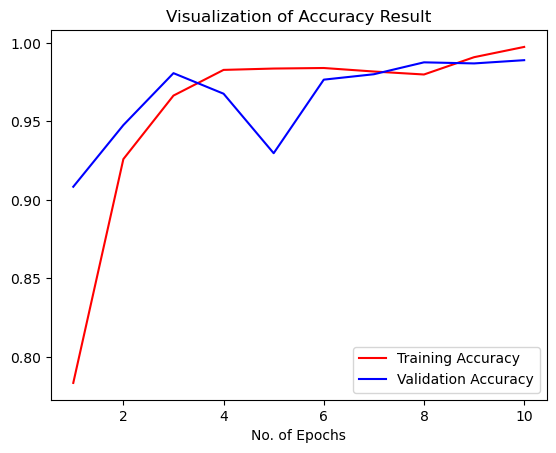

In [19]:
#Accuracy Visualization
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [20]:
#Some other metrics for model evaluation
class_name = validation_set.class_names
test_set = tensorflow.keras.utils.image_dataset_from_directory(r'D:\valid data', labels="inferred", label_mode="categorical", class_names=None, color_mode="rgb", batch_size=1, image_size=(128, 128), shuffle=False, seed=None, validation_split=None, subset=None, interpolation="bilinear", follow_links=False, crop_to_aspect_ratio=False)

Found 1451 files belonging to 3 classes.


In [21]:
y_pred = cnn.predict(test_set)
predicted_categories = tensorflow.argmax(y_pred, axis=1)

1451/1451 [==============================] - 54s 37ms/step


In [22]:
true_categories = tensorflow.concat([y for x, y in test_set], axis=0)
Y_true = tensorflow.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(1451,), dtype=int64, numpy=array([0, 0, 0, ..., 2, 2, 2], dtype=int64)>

In [23]:
predicted_categories

<tf.Tensor: shape=(1451,), dtype=int64, numpy=array([0, 0, 0, ..., 2, 2, 2], dtype=int64)>

In [24]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                        precision    recall  f1-score   support

                 Tomato___Early_blight       1.00      0.97      0.98       480
Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.97      1.00      0.99       490
                      Tomato___healthy       1.00      1.00      1.00       481

                              accuracy                           0.99      1451
                             macro avg       0.99      0.99      0.99      1451
                          weighted avg       0.99      0.99      0.99      1451



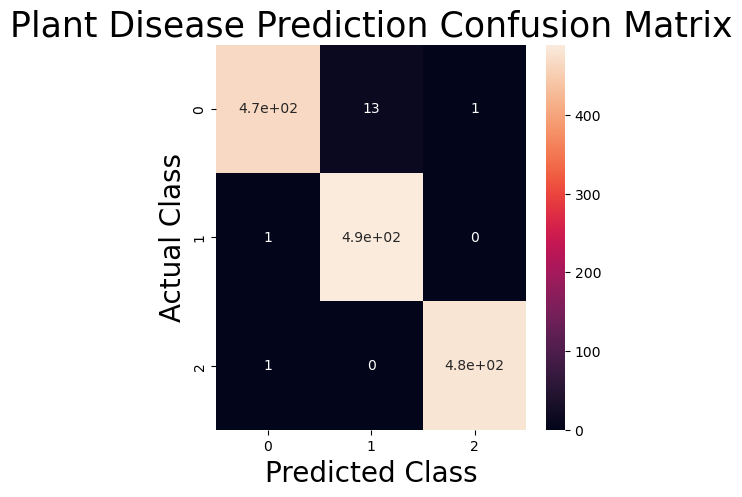

In [25]:
#Confusion Matrix Visualization
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [26]:
validation_set = tensorflow.keras.utils.image_dataset_from_directory(r'D:\valid data', labels="inferred", label_mode="categorical", class_names=None, color_mode="rgb", batch_size=32, image_size=(128, 128), shuffle=True, seed=None, validation_split=None, subset=None, interpolation="bilinear", follow_links=False, crop_to_aspect_ratio=False)
class_name = validation_set.class_names
print(class_name)

Found 1451 files belonging to 3 classes.
['Tomato___Early_blight', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___healthy']


In [27]:
#Loading Model
cnn = tensorflow.keras.models.load_model('trained_plant_disease_model.keras')

In [40]:
#Visualising and Performing Prediction on Single image
#Test Image Visualization
from PIL import Image
image_path = 'D:\\test\\TomatoEarlyBlight1.JPG'
img = Image.open(image_path)

# Display the image
img.show()


In [41]:
#Testing Model
image = tensorflow.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tensorflow.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)
print(predictions)
result_index = np.argmax(predictions) #Return index of max element
print(result_index)


1/1 [==============================] - 0s 87ms/step
[[9.317772e-01 2.939613e-07 6.822249e-02]]
0


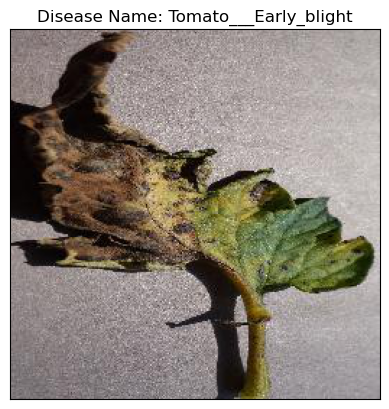

In [42]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()